# Market Positioning of Mobile

# Abstract:
   There is a new mobile company and the CEO wants to give a tough fight to big companies like Apple, Samsung etc. He has no idea of how to estimate the price of mobiles his company creates. A simple assumption of the price will not be profitable in this competitive world. To solve this problem he collects sales data of mobile phones of various companies. Thus, the CEO has hired you to find out some relation between features of a mobile phone(eg:- RAM, Internal Memory etc) and its selling price

## Problem Statement:
   Predict a price range, indicating how high the price is, using K-Nearest Neighbors algorithm.

### Libraries

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

### Load the dataset

In [3]:
mydata = pd.read_csv("Mobile_data.csv")
mydata

battery_power  clock_speed  fc  int_memory  m_dep  mobile_wt  n_cores  \
0               842          2.2   1           7    0.6        188        2   
1              1021          0.5   0          53    0.7        136        3   
2               563          0.5   2          41    0.9        145        5   
3               615          2.5   0          10    0.8        131        6   
4              1821          1.2  13          44    0.6        141        2   
...             ...          ...  ..         ...    ...        ...      ...   
1995            794          0.5   0           2    0.8        106        6   
1996           1965          2.6   0          39    0.2        187        4   
1997           1911          0.9   1          36    0.7        108        8   
1998           1512          0.9   4          46    0.1        145        5   
1999            510          2.0   5          45    0.9        168        6   

      pc  px_height  px_width   ram  sc_h  sc_w  talk_time  price_range  
0      2         20       756  2549     9     7         19            1  
1      6        905      1988  2631    17     3          7            2  
2      6       1263      1716  2603    11     2          9            2  
3      9       1216      1786  2769    16     8         11            2  
4     14       1208      1212  1411     8     2         15            1  
...   ..        ...       ...   ...   ...   ...        ...          ...  
1995  14       1222      1890   668    13     4         19            0  
1996   3        915      1965  2032    11    10         16            2  
1997   3        868      1632  3057     9     1          5            3  
1998   5        336       670   869    18    10         19            0  
1999  16        483       754  3919    19     4          2            3  

[2000 rows x 15 columns]

### Let’s see how many of each class is in our data set

In [4]:
mydata['price_range'].value_counts()

3    500
2    500
1    500
0    500
Name: price_range, dtype: int64

In [5]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   clock_speed    2000 non-null   float64
 2   fc             2000 non-null   int64  
 3   int_memory     2000 non-null   int64  
 4   m_dep          2000 non-null   float64
 5   mobile_wt      2000 non-null   int64  
 6   n_cores        2000 non-null   int64  
 7   pc             2000 non-null   int64  
 8   px_height      2000 non-null   int64  
 9   px_width       2000 non-null   int64  
 10  ram            2000 non-null   int64  
 11  sc_h           2000 non-null   int64  
 12  sc_w           2000 non-null   int64  
 13  talk_time      2000 non-null   int64  
 14  price_range    2000 non-null   int64  
dtypes: float64(2), int64(13)
memory usage: 234.5 KB


### Measure of dispersion

In [6]:
mydata.describe()

battery_power  clock_speed           fc   int_memory        m_dep  \
count    2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     1.522250     4.309500    32.046500     0.501750   
std       439.418206     0.816004     4.341444    18.145715     0.288416   
min       501.000000     0.500000     0.000000     2.000000     0.100000   
25%       851.750000     0.700000     1.000000    16.000000     0.200000   
50%      1226.000000     1.500000     3.000000    32.000000     0.500000   
75%      1615.250000     2.200000     7.000000    48.000000     0.800000   
max      1998.000000     3.000000    19.000000    64.000000     1.000000   

         mobile_wt      n_cores           pc    px_height     px_width  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean    140.249000     4.520500     9.916500   645.108000  1251.515500   
std      35.399655     2.287837     6.064315   443.780811   432.199447   
min      80.000000     1.000000     0.000000     0.000000   500.000000   
25%     109.000000     3.000000     5.000000   282.750000   874.750000   
50%     141.000000     4.000000    10.000000   564.000000  1247.000000   
75%     170.000000     7.000000    15.000000   947.250000  1633.000000   
max     200.000000     8.000000    20.000000  1960.000000  1998.000000   

               ram         sc_h         sc_w    talk_time  price_range  
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  
mean   2124.213000    12.306500     5.767000    11.011000     1.500000  
std    1084.732044     4.213245     4.356398     5.463955     1.118314  
min     256.000000     5.000000     0.000000     2.000000     0.000000  
25%    1207.500000     9.000000     2.000000     6.000000     0.750000  
50%    2146.500000    12.000000     5.000000    11.000000     1.500000  
75%    3064.500000    16.000000     9.000000    16.000000     2.250000  
max    3998.000000    19.000000    18.000000    20.000000     3.000000

### Check the null value

In [7]:
mydata.isnull().sum()

battery_power    0
clock_speed      0
fc               0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
price_range      0
dtype: int64

In [8]:
cat_cols = mydata.select_dtypes(include = 'object')
num_cols = mydata.select_dtypes(include = np.number)
print()

## Correlation

In [9]:
mydata_corr = mydata.head(10)
mydata_corr = mydata_corr.corr()
mydata_corr

battery_power  clock_speed        fc  int_memory     m_dep  \
battery_power       1.000000    -0.218733  0.395949    0.165261  0.297512   
clock_speed        -0.218733     1.000000  0.055353   -0.601333  0.121747   
fc                  0.395949     0.055353  1.000000    0.153537 -0.133393   
int_memory          0.165261    -0.601333  0.153537    1.000000  0.275120   
m_dep               0.297512     0.121747 -0.133393    0.275120  1.000000   
mobile_wt           0.469280     0.012319 -0.193323    0.128691  0.533816   
n_cores            -0.140099     0.145871 -0.298027   -0.086787  0.149816   
pc                 -0.074174    -0.072208  0.438357    0.173023 -0.493080   
px_height          -0.296446    -0.222098  0.316844    0.198217 -0.114176   
px_width           -0.291541    -0.183924 -0.127226    0.244044  0.245194   
ram                -0.276965     0.596199 -0.090664   -0.105074  0.527236   
sc_h               -0.084451    -0.412306 -0.602810   -0.026307 -0.278564   
sc_w               -0.472460     0.595795 -0.170826   -0.795320 -0.483395   
talk_time           0.056304     0.429027  0.233004   -0.124076 -0.156686   
price_range        -0.100502     0.431713  0.081686   -0.095126  0.515170   

               mobile_wt   n_cores        pc  px_height  px_width       ram  \
battery_power   0.469280 -0.140099 -0.074174  -0.296446 -0.291541 -0.276965   
clock_speed     0.012319  0.145871 -0.072208  -0.222098 -0.183924  0.596199   
fc             -0.193323 -0.298027  0.438357   0.316844 -0.127226 -0.090664   
int_memory      0.128691 -0.086787  0.173023   0.198217  0.244044 -0.105074   
m_dep           0.533816  0.149816 -0.493080  -0.114176  0.245194  0.527236   
mobile_wt       1.000000 -0.260030 -0.636066  -0.668184 -0.405468 -0.046295   
n_cores        -0.260030  1.000000  0.349624  -0.137945 -0.203206  0.266829   
pc             -0.636066  0.349624  1.000000   0.371415 -0.108422 -0.222514   
px_height      -0.668184 -0.137945  0.371415   1.000000  0.742623 -0.114932   
px_width       -0.405468 -0.203206 -0.108422   0.742623  1.000000  0.240822   
ram            -0.046295  0.266829 -0.222514  -0.114932  0.240822  1.000000   
sc_h           -0.287690  0.254088  0.155285   0.138741  0.289287 -0.409690   
sc_w           -0.516052  0.363166  0.138796  -0.094973 -0.178644  0.250210   
talk_time       0.134819  0.298206  0.450016  -0.523287 -0.731152  0.178684   
price_range    -0.235187  0.251296 -0.097033   0.122819  0.417746  0.912489   

                   sc_h      sc_w  talk_time  price_range  
battery_power -0.084451 -0.472460   0.056304    -0.100502  
clock_speed   -0.412306  0.595795   0.429027     0.431713  
fc            -0.602810 -0.170826   0.233004     0.081686  
int_memory    -0.026307 -0.795320  -0.124076    -0.095126  
m_dep         -0.278564 -0.483395  -0.156686     0.515170  
mobile_wt     -0.287690 -0.516052   0.134819    -0.235187  
n_cores        0.254088  0.363166   0.298206     0.251296  
pc             0.155285  0.138796   0.450016    -0.097033  
px_height      0.138741 -0.094973  -0.523287     0.122819  
px_width       0.289287 -0.178644  -0.731152     0.417746  
ram           -0.409690  0.250210   0.178684     0.912489  
sc_h           1.000000  0.108245  -0.364897    -0.299938  
sc_w           0.108245  1.000000   0.203012     0.191273  
talk_time     -0.364897  0.203012   1.000000     0.016584  
price_range   -0.299938  0.191273   0.016584     1.000000

## Heatmap

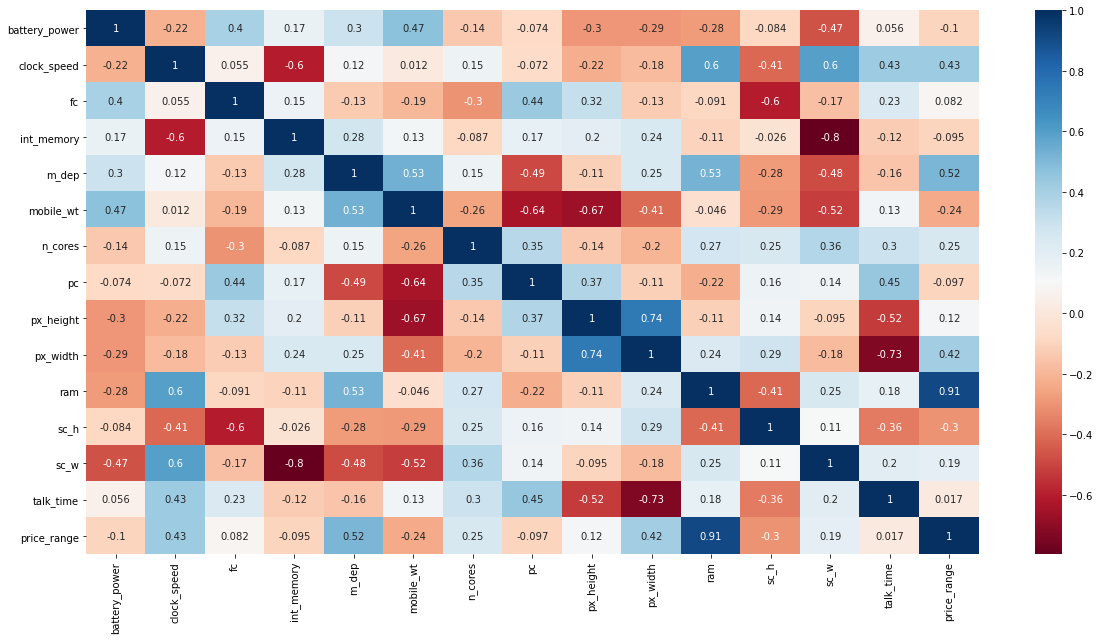

In [10]:
plt.figure(figsize=(20,10))
sns.heatmap(mydata_corr, annot = True, cmap = 'RdBu')

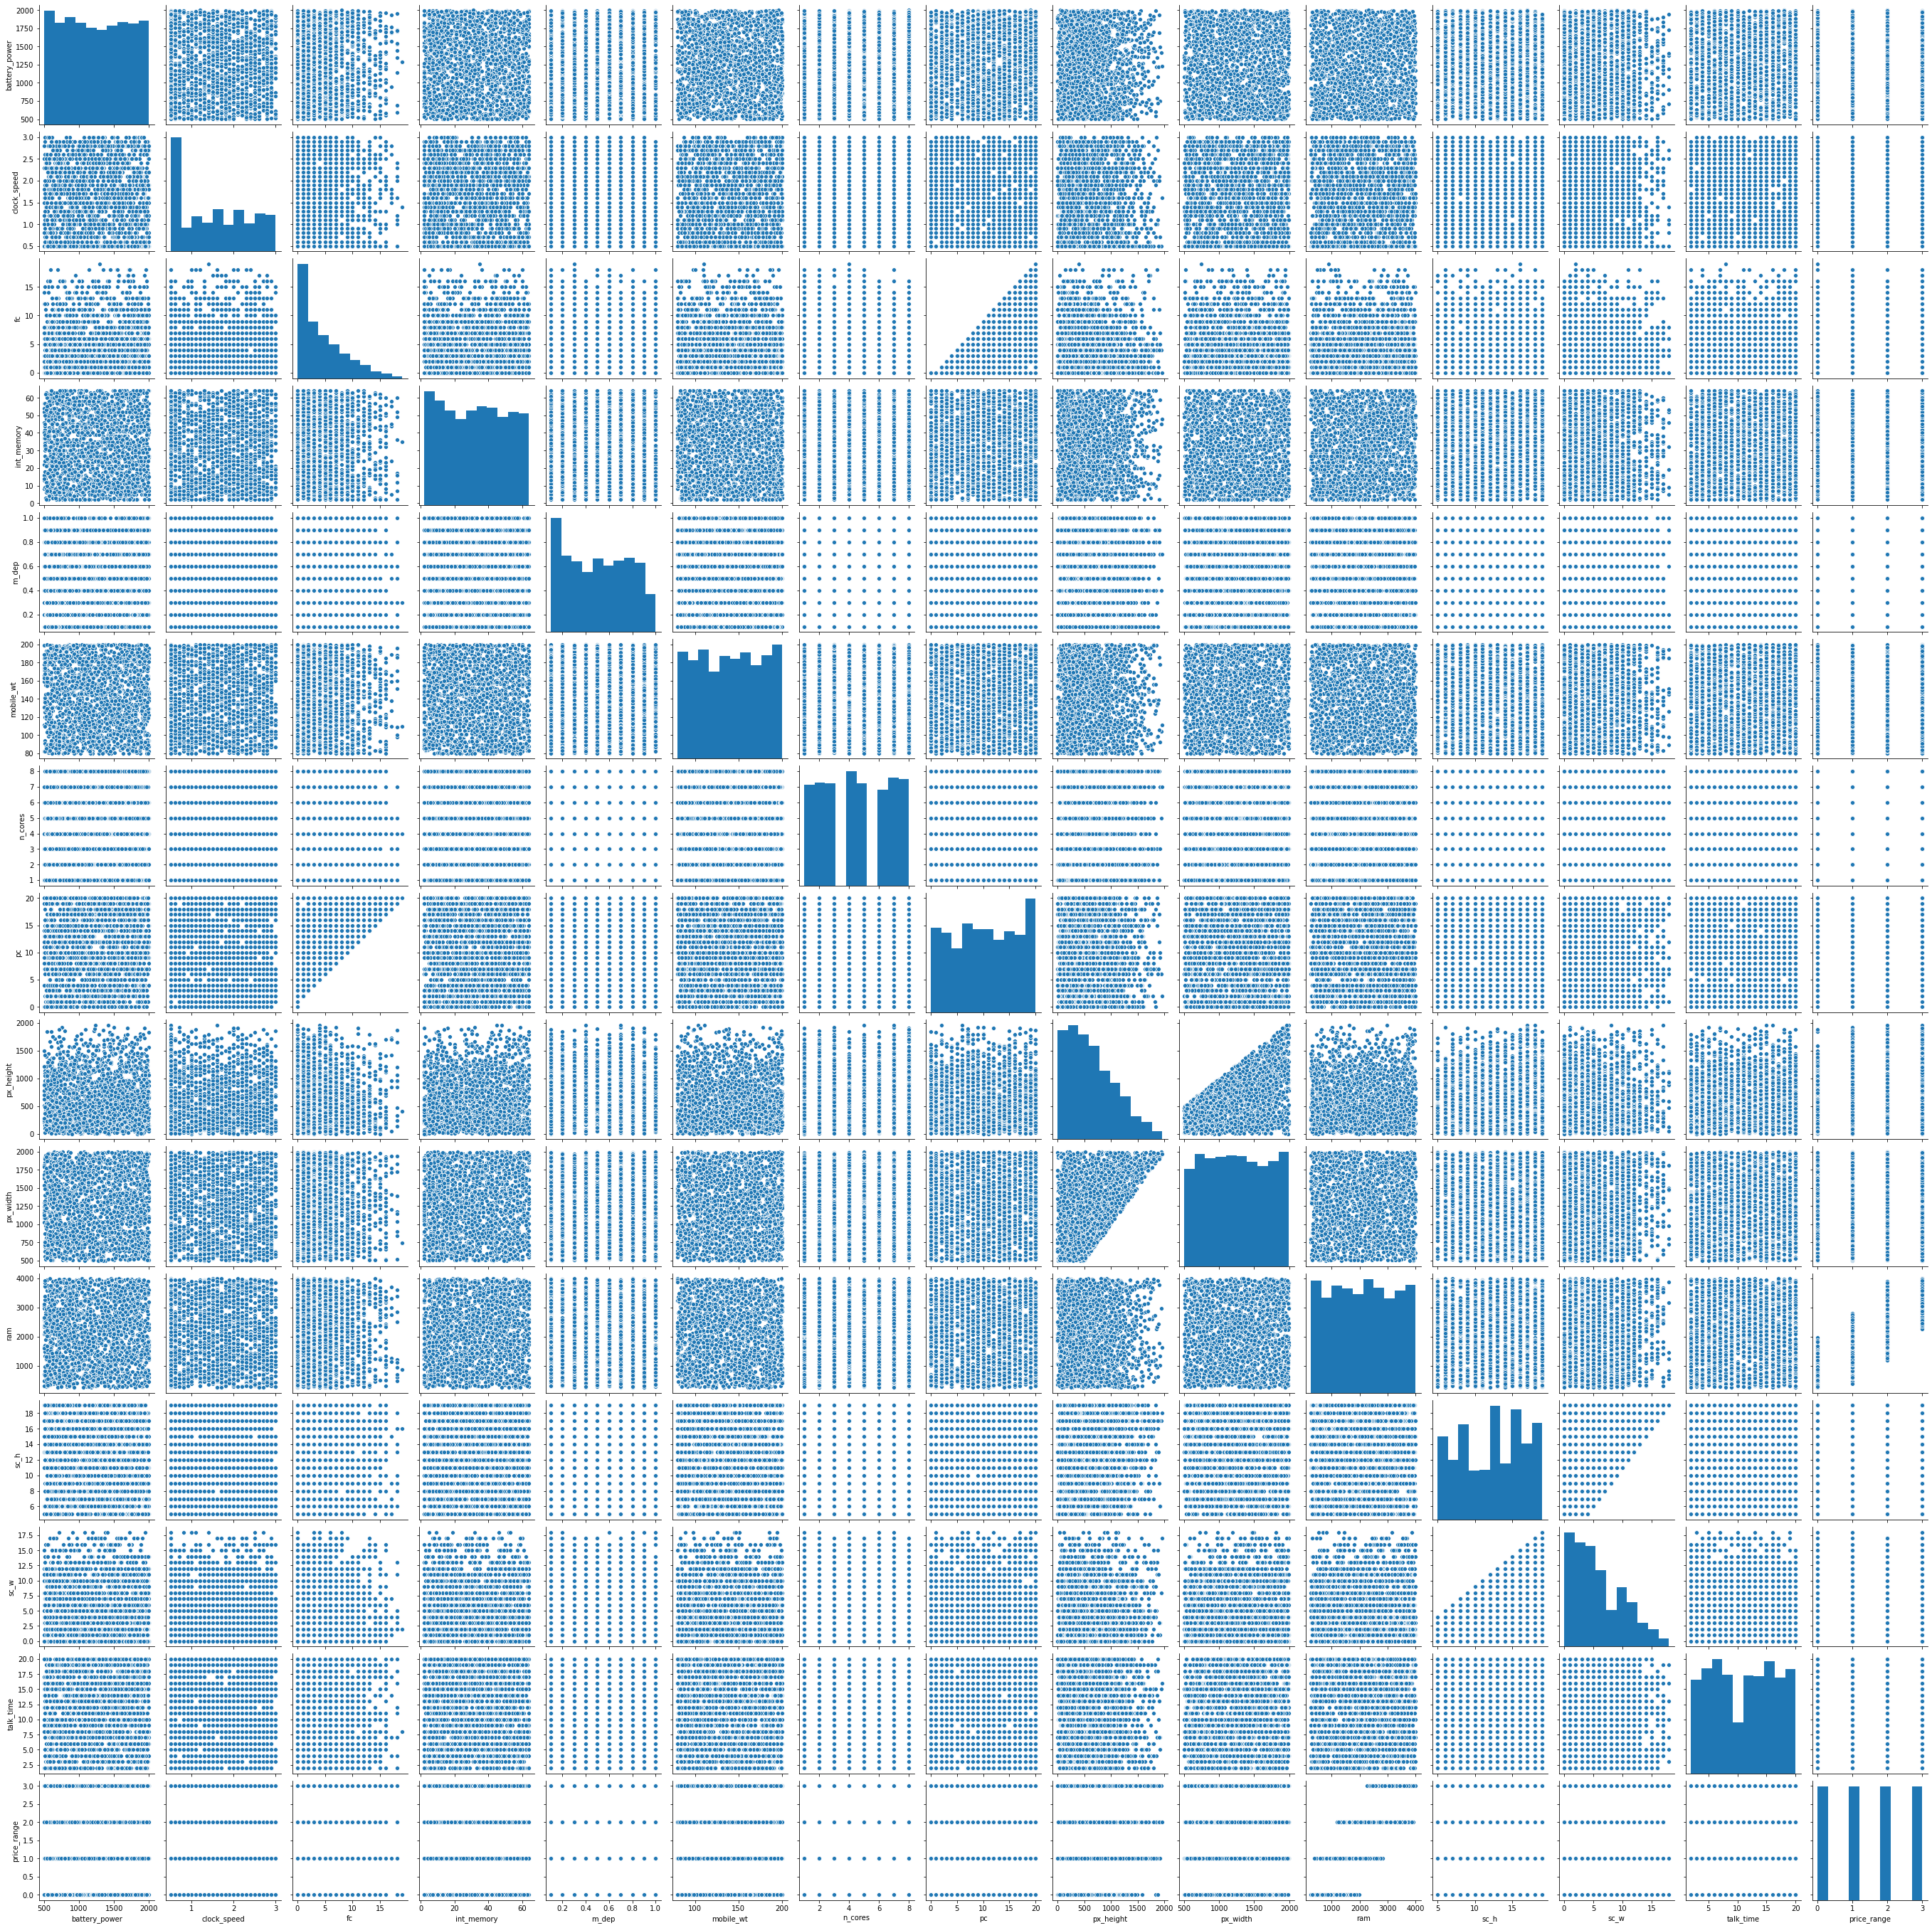

In [11]:
sns.pairplot(mydata)

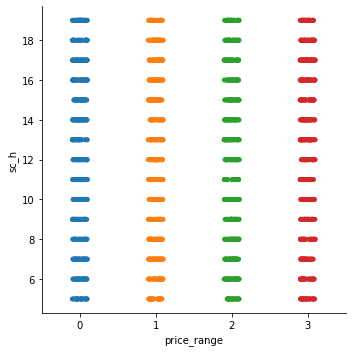

In [12]:
sns.catplot(x='price_range',y='sc_h',data=mydata);

Text(0, 0.5, 'ram')

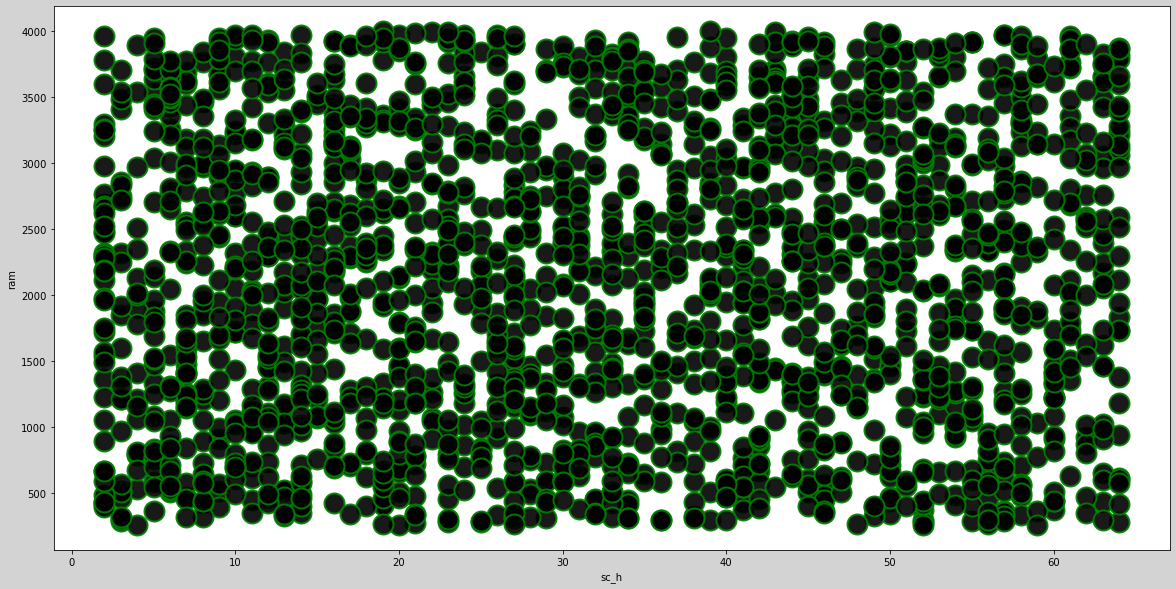

In [13]:
plt.figure(figsize=(20,10),facecolor="lightgrey")
plt.scatter(mydata.int_memory,mydata.ram,
           color="black",alpha=0.9,edgecolors="green",linewidths=2,s=400)
plt.xlabel("sc_h")
plt.ylabel("ram")

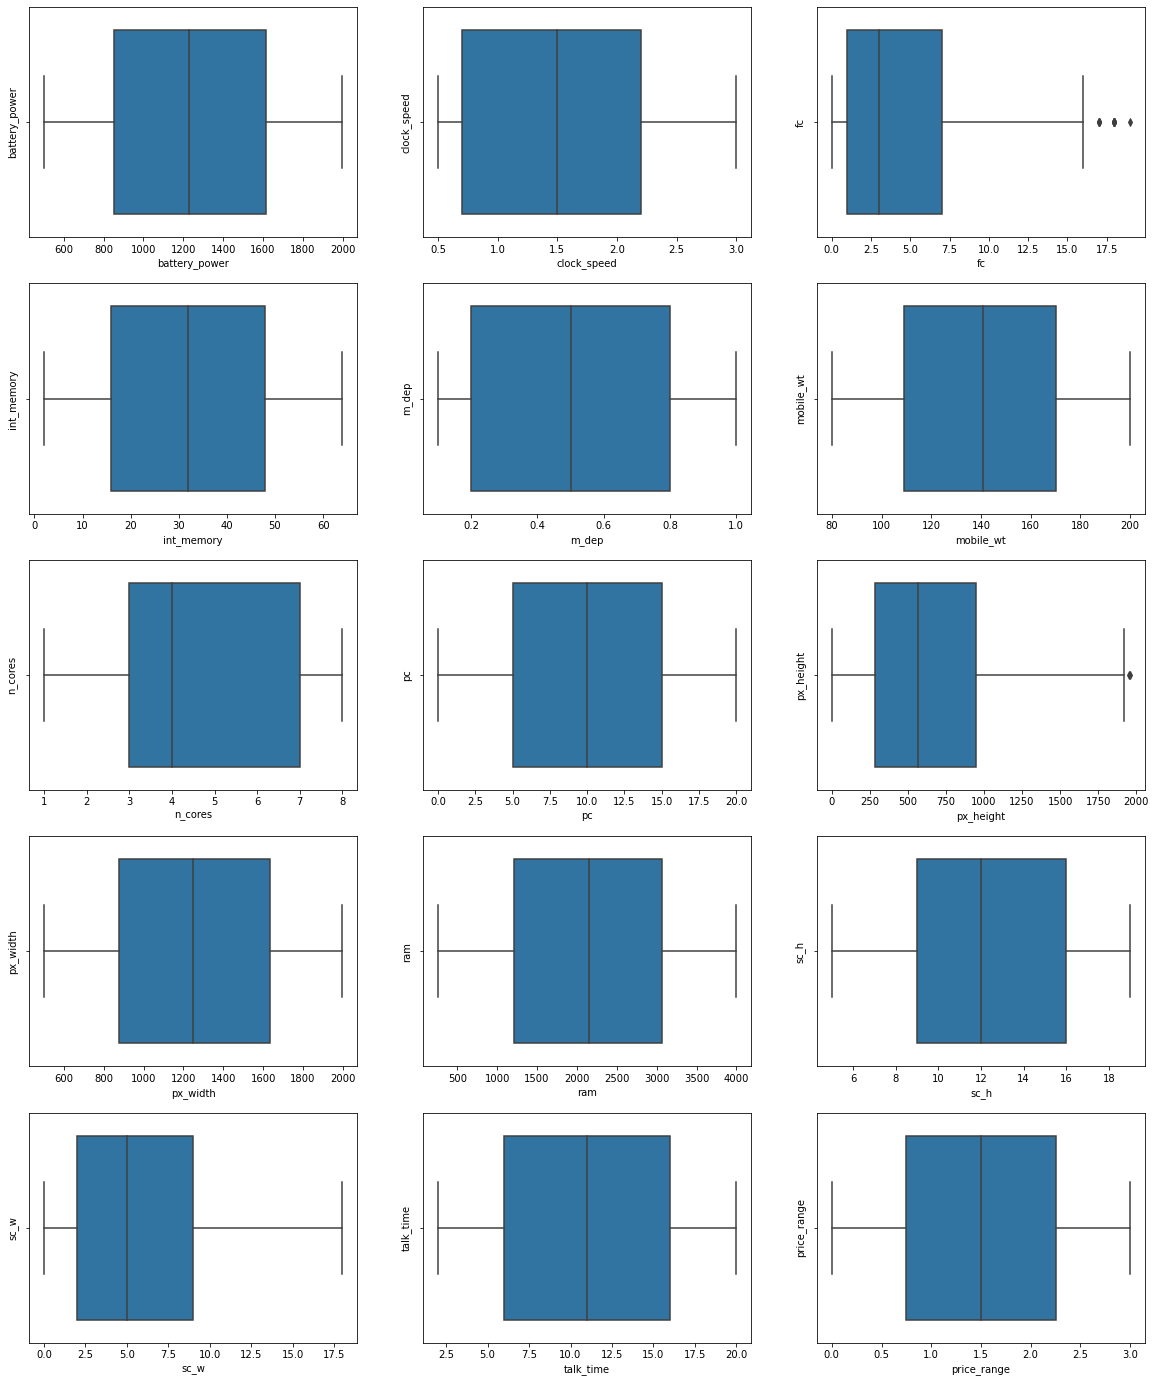

In [15]:
plt.figure(figsize=(20,50))
for i,col in enumerate(mydata,1):
    plt.subplot(10,3,i)
    sns.boxplot(mydata[col])
    plt.ylabel(col)
plt.show()

### Target  variable graph 

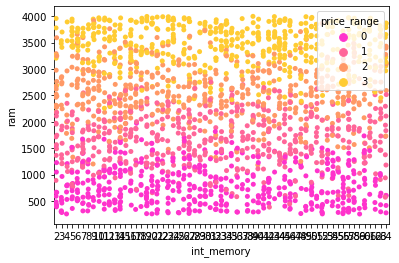

In [16]:
sns.stripplot(x='int_memory',y='ram',data=mydata,palette='spring',hue='price_range')

## Independent variables

In [14]:
x_ind = mydata.drop('price_range', axis = 1)
x_ind.head(10)

battery_power  clock_speed  fc  int_memory  m_dep  mobile_wt  n_cores  pc  \
0            842          2.2   1           7    0.6        188        2   2   
1           1021          0.5   0          53    0.7        136        3   6   
2            563          0.5   2          41    0.9        145        5   6   
3            615          2.5   0          10    0.8        131        6   9   
4           1821          1.2  13          44    0.6        141        2  14   
5           1859          0.5   3          22    0.7        164        1   7   
6           1821          1.7   4          10    0.8        139        8  10   
7           1954          0.5   0          24    0.8        187        4   0   
8           1445          0.5   0          53    0.7        174        7  14   
9            509          0.6   2           9    0.1         93        5  15   

   px_height  px_width   ram  sc_h  sc_w  talk_time  
0         20       756  2549     9     7         19  
1        905      1988  2631    17     3          7  
2       1263      1716  2603    11     2          9  
3       1216      1786  2769    16     8         11  
4       1208      1212  1411     8     2         15  
5       1004      1654  1067    17     1         10  
6        381      1018  3220    13     8         18  
7        512      1149   700    16     3          5  
8        386       836  1099    17     1         20  
9       1137      1224   513    19    10         12

## Dependent variable

In [15]:
y_dep = mydata["price_range"]
y_dep

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

## Training a KNN with data and check it’s performance

### Train and test data
   Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set.



In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_ind,y_dep,train_size = 0.8, random_state = 7)

### Standardize the dataset:
   Data Standardization give data zero mean and unit variance, it is good practice, especially for algorithms such as KNN which is based on distance of cases:

In [17]:
from sklearn.preprocessing import StandardScaler


In [18]:
norm =  StandardScaler()

In [19]:
x_train=norm.fit_transform(x_train)

In [20]:
x_test = norm.fit_transform(x_test)

### Knn model:

In [21]:
from sklearn.neighbors import KNeighborsClassifier

### No of rows and columns

In [22]:
mydata.shape

(2000, 15)

### Squareroot of no.of data

In [23]:
np.sqrt(2000) 

44.721359549995796

### Create model using KNN

In [24]:
KNN =  KNeighborsClassifier(n_neighbors = 43,p = 4,metric = 'euclidean') 

### Fit the model

In [25]:
KNN = KNN.fit(x_train,y_train)

### Predict the model

In [26]:
y_pred = KNN.predict(x_test)
y_pred

array([3, 3, 3, 1, 0, 2, 3, 1, 1, 2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 2, 2, 2,
       3, 0, 1, 1, 3, 1, 1, 3, 2, 1, 1, 3, 3, 2, 3, 1, 2, 3, 0, 3, 2, 0,
       1, 1, 0, 3, 1, 1, 1, 3, 2, 0, 1, 3, 0, 2, 3, 3, 1, 1, 0, 3, 0, 2,
       1, 1, 0, 3, 0, 1, 0, 1, 1, 1, 2, 0, 0, 3, 0, 2, 2, 0, 1, 0, 0, 1,
       1, 3, 1, 3, 3, 1, 0, 3, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 2, 2, 1,
       2, 2, 2, 0, 0, 2, 0, 2, 1, 2, 1, 1, 0, 2, 2, 0, 1, 1, 0, 3, 3, 2,
       1, 0, 3, 0, 2, 1, 2, 0, 0, 0, 1, 3, 3, 2, 0, 2, 1, 1, 2, 0, 3, 1,
       2, 0, 3, 1, 2, 2, 2, 2, 1, 1, 0, 0, 2, 3, 2, 2, 0, 1, 1, 0, 1, 0,
       3, 2, 2, 0, 2, 2, 3, 1, 0, 2, 2, 1, 0, 1, 0, 2, 2, 3, 1, 1, 0, 1,
       2, 0, 0, 1, 2, 1, 1, 2, 3, 0, 2, 0, 1, 2, 2, 1, 0, 2, 3, 3, 1, 3,
       2, 0, 2, 1, 3, 2, 1, 2, 0, 3, 2, 1, 1, 1, 0, 0, 3, 2, 0, 3, 2, 3,
       1, 1, 2, 2, 2, 3, 0, 2, 3, 0, 0, 1, 2, 1, 3, 3, 2, 1, 1, 1, 1, 3,
       0, 3, 1, 3, 2, 3, 2, 3, 3, 0, 0, 2, 3, 3, 0, 1, 3, 3, 3, 1, 3, 2,
       0, 3, 2, 2, 2, 3, 1, 3, 1, 0, 1, 1, 2, 1, 0,

## Performance Measures:

In [27]:
from sklearn.metrics import confusion_matrix,accuracy_score

### confusion_matrix

In [57]:
cm1 = confusion_matrix(y_test,y_pred)
cm1

array([[89, 19,  1,  0],
       [ 9, 61, 19,  0],
       [ 1, 17, 78, 10],
       [ 0,  0, 19, 77]])

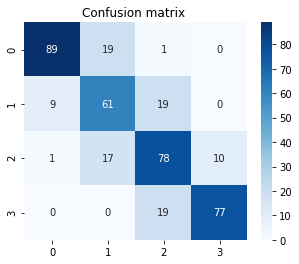

In [60]:
cm1_df = pd.DataFrame(cm1,index = ['0','1','2','3'],columns =['0','1','2','3'])
plt.figure(figsize=(5,4))
sns.heatmap(cm1_df,annot = True,cmap = 'Blues')
plt.title("Confusion matrix ")
plt.show()

### accuracy_score

In [59]:
accuracy_score(y_test,y_pred)

0.7625

# The accuracy score using KNN for mobile dataset is 76%

# 2.Error Rate Method:

In [30]:
error_rate = []
for i in range(1,60):
    knn_new = KNeighborsClassifier(n_neighbors = i)
    knn_new.fit(x_train,y_train)
    y_pred_er = knn_new.predict(x_test)
    error_rate.append(np.mean(y_pred_er != y_test))

Text(0, 0.5, 'error mean')

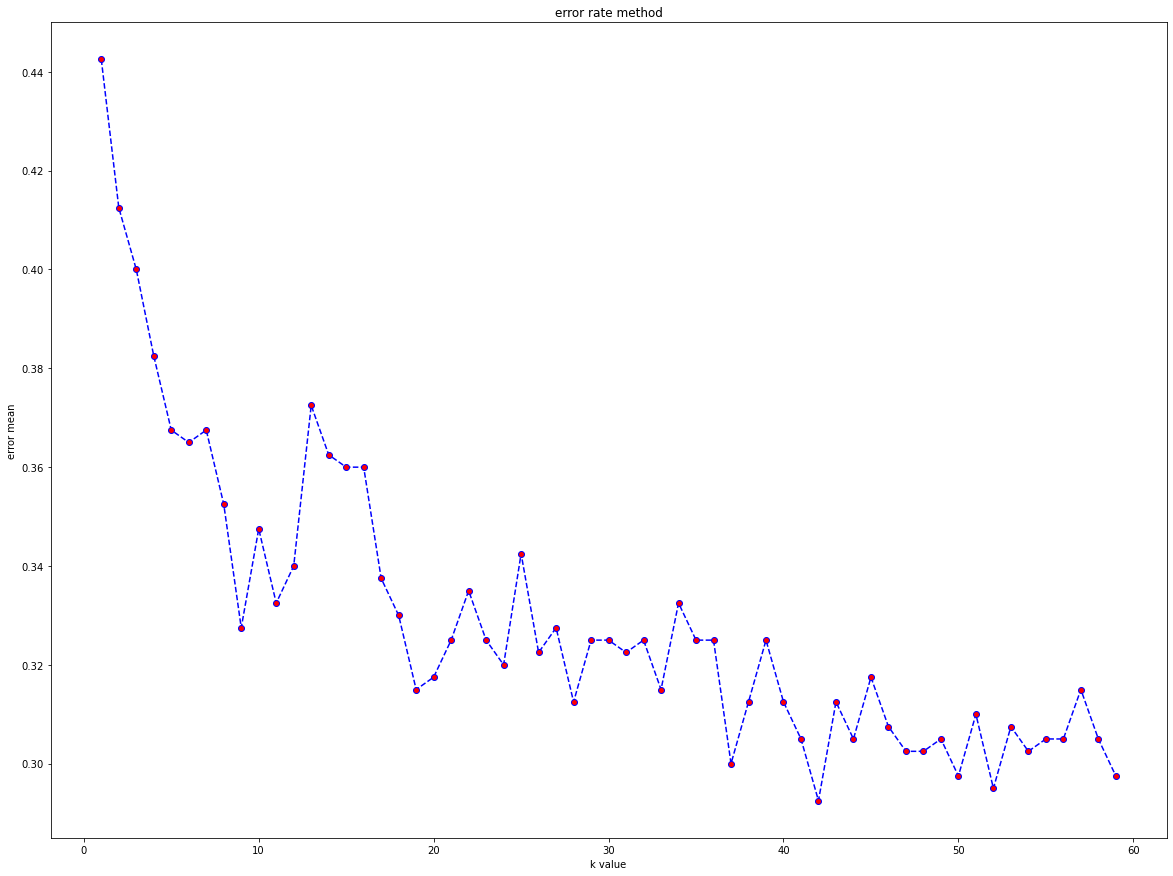

In [31]:
plt.figure(figsize = (20,15))
plt.plot(range(1,60),error_rate,color = 'blue',linestyle ='dashed',marker ='o', markerfacecolor = 'red')
plt.title("error rate method")
plt.xlabel("k value")
plt.ylabel('error mean')

In [61]:
confusion_matrix(y_test,y_pred_er)

array([[85, 23,  1,  0],
       [13, 56, 20,  0],
       [ 0, 27, 65, 14],
       [ 0,  0, 25, 71]])

In [63]:
accuracy_score(y_test,y_pred_er)

0.6925

In [34]:
knn_new = KNeighborsClassifier(n_neighbors =53)
knn_new.fit(x_train,y_train)
y_pred_er = knn_new.predict(x_test)
y_pred_er

array([3, 3, 3, 1, 0, 2, 2, 1, 1, 2, 0, 1, 2, 0, 0, 0, 1, 1, 0, 2, 2, 2,
       2, 2, 1, 1, 3, 1, 1, 3, 3, 1, 1, 3, 3, 2, 2, 1, 2, 3, 2, 3, 2, 0,
       1, 1, 0, 3, 1, 1, 1, 3, 2, 0, 2, 3, 0, 2, 3, 2, 1, 1, 0, 3, 1, 2,
       3, 1, 0, 3, 0, 1, 0, 1, 1, 1, 1, 0, 0, 2, 1, 2, 2, 0, 1, 0, 0, 3,
       1, 3, 1, 3, 3, 1, 0, 3, 2, 0, 3, 2, 2, 0, 2, 2, 0, 0, 0, 1, 2, 1,
       2, 2, 2, 0, 0, 2, 0, 2, 1, 2, 1, 1, 0, 2, 2, 0, 1, 0, 0, 3, 3, 2,
       1, 0, 3, 0, 2, 1, 2, 0, 1, 0, 1, 3, 3, 2, 0, 2, 1, 1, 2, 0, 3, 1,
       2, 0, 3, 1, 2, 2, 2, 2, 1, 1, 0, 0, 2, 3, 2, 2, 0, 1, 1, 0, 2, 0,
       3, 2, 1, 0, 2, 3, 3, 0, 0, 2, 2, 2, 0, 1, 0, 2, 2, 2, 1, 1, 0, 1,
       2, 0, 0, 1, 2, 1, 0, 2, 3, 0, 1, 0, 1, 2, 2, 1, 0, 2, 3, 3, 1, 3,
       2, 0, 3, 1, 3, 2, 1, 2, 0, 3, 2, 1, 1, 2, 0, 0, 3, 2, 0, 3, 2, 3,
       1, 1, 2, 1, 2, 3, 0, 2, 3, 0, 0, 1, 2, 1, 3, 3, 3, 1, 1, 1, 1, 3,
       0, 3, 1, 3, 2, 3, 2, 3, 3, 0, 0, 2, 3, 3, 0, 1, 3, 3, 3, 1, 3, 2,
       0, 3, 2, 2, 2, 2, 1, 3, 0, 0, 1, 1, 2, 1, 0,

In [35]:
accuracy_score(y_test,y_pred_er)

0.6925

In [67]:
from sklearn.svm import SVC

In [68]:
knn1 = SVC(kernel = 'linear')

In [69]:
knn1.fit(x_train,y_train)

SVC(kernel='linear')

In [70]:
y_pred = knn1.predict(x_test)
y_pred

array([3, 3, 2, 1, 0, 2, 3, 1, 1, 2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 1, 2, 1,
       1, 1, 2, 1, 3, 1, 2, 3, 3, 0, 0, 2, 3, 2, 3, 2, 2, 3, 2, 3, 2, 0,
       2, 1, 0, 3, 1, 0, 1, 3, 2, 0, 2, 2, 1, 2, 3, 3, 1, 1, 1, 3, 0, 3,
       3, 2, 0, 3, 0, 1, 0, 1, 2, 0, 2, 0, 0, 2, 1, 3, 2, 1, 1, 0, 1, 2,
       1, 3, 2, 3, 3, 0, 0, 3, 1, 0, 2, 2, 2, 0, 3, 2, 0, 1, 0, 2, 2, 2,
       3, 3, 2, 0, 0, 2, 0, 2, 0, 3, 2, 1, 0, 2, 3, 0, 1, 0, 0, 3, 3, 2,
       1, 0, 3, 1, 3, 1, 1, 0, 1, 0, 2, 3, 3, 1, 0, 1, 2, 0, 2, 0, 3, 1,
       2, 1, 2, 1, 2, 3, 2, 2, 1, 2, 0, 0, 2, 3, 2, 3, 0, 1, 1, 0, 1, 0,
       3, 2, 1, 0, 2, 3, 3, 0, 0, 3, 1, 2, 0, 0, 0, 2, 2, 2, 1, 0, 0, 2,
       3, 0, 0, 2, 2, 1, 0, 1, 3, 0, 1, 0, 0, 2, 2, 1, 1, 2, 3, 3, 1, 2,
       2, 0, 3, 1, 3, 2, 2, 2, 0, 3, 2, 0, 2, 0, 1, 0, 3, 1, 0, 3, 3, 3,
       1, 1, 1, 2, 3, 3, 0, 1, 3, 0, 0, 1, 2, 2, 3, 3, 3, 1, 1, 1, 1, 3,
       0, 3, 1, 2, 2, 3, 2, 3, 3, 0, 0, 3, 3, 2, 1, 1, 3, 3, 2, 1, 3, 2,
       0, 3, 2, 3, 2, 3, 1, 2, 0, 0, 2, 1, 3, 1, 0,

In [71]:
cm2 = confusion_matrix(y_test,y_pred)
cm2

array([[101,   8,   0,   0],
       [  0,  86,   3,   0],
       [  0,   2, 101,   3],
       [  0,   0,   1,  95]])

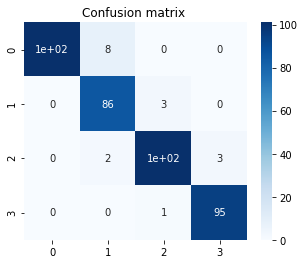

In [72]:
cm2_df = pd.DataFrame(cm2,index = ['0','1','2','3'],columns =['0','1','2','3'])
plt.figure(figsize=(5,4))
sns.heatmap(cm2_df,annot = True,cmap = 'Blues')
plt.title("Confusion matrix ")
plt.show()

In [73]:
accuracy_score(y_test,y_pred)

0.9575

In [74]:
kernel = ['linear','poly','rbf','sigmoid']
for i in kernel:
    knn1 = SVC(kernel = i)
    knn1 = knn1.fit(x_train,y_train)
    print("kerner : ", i)
    print("acc_score : ", accuracy_score(y_test,knn1.predict(x_test)))

kerner :  linear
acc_score :  0.9575
kerner :  poly
acc_score :  0.815
kerner :  rbf
acc_score :  0.885
kerner :  sigmoid
acc_score :  0.92


In [75]:
KNN =  KNeighborsClassifier(n_neighbors = 43,p = 4,metric = 'manhattan')

In [76]:
KNN = KNN.fit(x_train,y_train)

In [77]:
y_pred = KNN.predict(x_test)
y_pred

array([3, 2, 2, 1, 0, 2, 3, 1, 1, 2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 2, 2, 2,
       2, 2, 2, 1, 3, 1, 2, 3, 2, 1, 0, 3, 3, 2, 3, 2, 2, 3, 1, 3, 2, 0,
       2, 1, 0, 3, 1, 0, 1, 3, 2, 0, 2, 3, 0, 2, 3, 3, 1, 1, 1, 3, 0, 2,
       3, 1, 0, 3, 0, 1, 1, 1, 1, 1, 2, 0, 0, 3, 1, 3, 2, 1, 1, 0, 0, 1,
       1, 3, 1, 3, 3, 1, 0, 3, 2, 0, 3, 2, 2, 0, 2, 2, 0, 0, 0, 2, 2, 1,
       2, 3, 0, 0, 0, 2, 0, 2, 1, 3, 2, 1, 0, 2, 3, 0, 1, 0, 0, 3, 3, 2,
       1, 0, 3, 0, 2, 1, 2, 0, 1, 0, 1, 3, 3, 1, 0, 2, 2, 0, 2, 0, 3, 1,
       2, 1, 3, 1, 2, 2, 2, 2, 1, 1, 0, 0, 2, 3, 2, 2, 0, 1, 1, 0, 2, 0,
       3, 2, 2, 0, 2, 2, 3, 0, 0, 2, 1, 2, 0, 1, 0, 2, 2, 2, 0, 1, 0, 2,
       2, 0, 0, 1, 2, 1, 0, 2, 3, 0, 1, 0, 0, 2, 2, 1, 0, 2, 3, 3, 1, 2,
       2, 0, 2, 1, 3, 2, 2, 2, 0, 3, 2, 1, 1, 2, 0, 0, 3, 2, 0, 3, 2, 3,
       1, 1, 2, 2, 2, 3, 0, 2, 3, 0, 0, 1, 2, 1, 3, 3, 3, 1, 1, 1, 1, 3,
       0, 3, 1, 3, 2, 3, 2, 3, 3, 0, 0, 3, 3, 2, 0, 2, 3, 3, 1, 1, 3, 2,
       0, 3, 3, 3, 2, 3, 2, 3, 1, 0, 2, 1, 2, 1, 0,

In [78]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [79]:
cm =confusion_matrix(y_test,y_pred)
cm

array([[89, 19,  1,  0],
       [ 9, 61, 19,  0],
       [ 1, 17, 78, 10],
       [ 0,  0, 19, 77]])

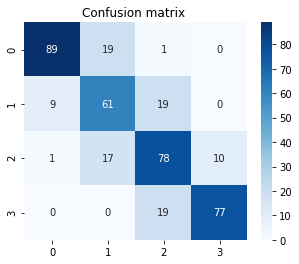

In [81]:
cm_df = pd.DataFrame(cm,index = ['0','1','2','3'],columns =['0','1','2','3'])
plt.figure(figsize=(5,4))
sns.heatmap(cm_df,annot = True ,cmap = 'Blues')
plt.title("Confusion matrix ")
plt.show()

In [82]:
accuracy_score(y_test,y_pred)

0.7625

### Conclusion:
   Thus price range of the mobile predicted by machine is almost equal to actual data.The prediction is 76% accurate. Using this model we can classify the price range of new mobile.By using hperparameter tuning we can improve the accuracy.